In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [7]:
# !ls
data=pd.read_csv('29588090-1.03.Dummies.csv')
data.head()

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No


In [8]:
data['Attendance']=data['Attendance'].map({'Yes':1,'No':0})
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


## Declare Independemt and Dependent Variable

In [9]:
x=data[['SAT','Attendance']]
y=data['GPA']

### Lets plot and look at the data

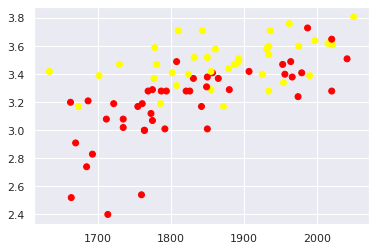

In [10]:
plt.scatter(x['SAT'],y,c=x['Attendance'],cmap='autumn')

## Regression 

In [18]:
x1=sm.add_constant(x)
result=sm.OLS(y,x1).fit()
print(result.summary())

def adjusted_rSquare(r):
    n=x.shape[0]
    p=x.shape[1]
    return 1-(1-r)*(n-1)/(n-p-1)

adjusted_rSquare(0.565)

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Fri, 02 Sep 2022   Prob (F-statistic):           2.19e-15
Time:                        19:05:57   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.0

0.5542592592592592

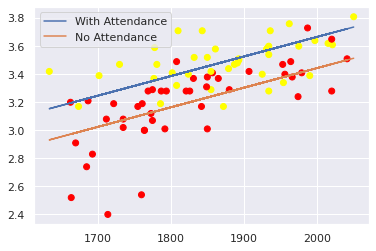

In [12]:
plt.scatter(x['SAT'],y,c=x['Attendance'],cmap='autumn')
yhat=0.6439+0.2226+0.0014*x['SAT']
yha=0.6439+0.0014*x['SAT']
fig=plt.plot(x['SAT'],yhat,label='With Attendance')
fig=plt.plot(x['SAT'],yha,label='No Attendance')
plt.legend()

## Prediciting Data

In [13]:
new_data=pd.DataFrame({'const':1,'SAT':[1670,1700],'Attendance':[1,0]})
# new_data.rename(index={0:'Will',1:'Mike'})
pred=result.predict(new_data)
predict=pd.DataFrame({'Predictions':pred})
new_data=new_data.join(predict)
new_data.rename(index={0:'Will',1:'Mike'})

,const,SAT,Attendance,Predictions
Will,1,1670,1,3.204163
Mike,1,1700,0,3.023513
